In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [51]:
# data = pd.read_csv('/content/Medical_dataset.csv')
data = pd.read_csv('./Medical_dataset.csv')

In [55]:
data.head(20)

,sex,Height,Weight,age,diabetes,Goal
0,1.0,73.847017,241.893563,63,0,Weight Loss
1,0.0,68.781904,162.310473,37,0,Weight gain
2,1.0,74.110105,212.740856,41,0,Weight Loss
3,1.0,71.730978,220.042470,56,0,Weight Loss
4,0.0,69.881796,206.349801,57,1,Healthy
5,1.0,67.253016,152.212156,57,0,Weight gain
6,1.0,68.785081,183.927889,56,0,Healthy
7,1.0,68.348516,167.971111,44,1,Weight gain
8,0.0,67.018950,175.929440,52,0,Healthy
9,1.0,63.456494,156.399676,57,0,Weight gain


C:\Users\buzurgaan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

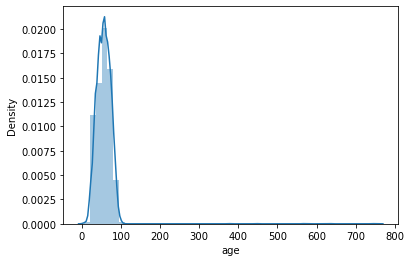

In [56]:
sns.distplot(data['age'])

C:\Users\buzurgaan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Goal', ylabel='count'>

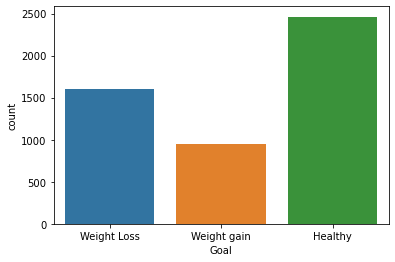

In [57]:
sns.countplot(data['Goal'])

C:\Users\buzurgaan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diabetes', ylabel='count'>

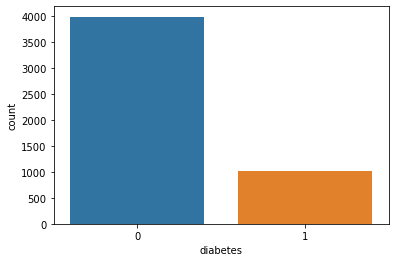

In [58]:
sns.countplot(data['diabetes'])

C:\Users\buzurgaan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

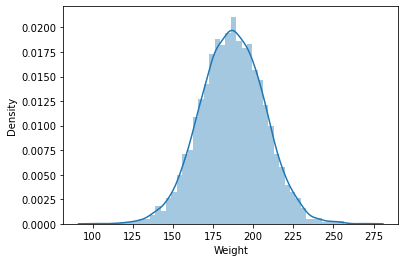

In [59]:
sns.distplot(data['Weight'])

In [60]:
data.shape

(5013, 6)

In [61]:
data.isnull().sum()

sex         2
Height      0
Weight      0
age         0
diabetes    0
Goal        0
dtype: int64

In [62]:
data=data[~(data['sex'].isnull())]

In [63]:
data.isnull().sum()

sex         0
Height      0
Weight      0
age         0
diabetes    0
Goal        0
dtype: int64

In [65]:
data.head(15)

,sex,Height,Weight,age,diabetes,Goal
0,1.0,73.847017,241.893563,63,0,Weight Loss
1,0.0,68.781904,162.310473,37,0,Weight gain
2,1.0,74.110105,212.740856,41,0,Weight Loss
3,1.0,71.730978,220.042470,56,0,Weight Loss
4,0.0,69.881796,206.349801,57,1,Healthy
5,1.0,67.253016,152.212156,57,0,Weight gain
6,1.0,68.785081,183.927889,56,0,Healthy
7,1.0,68.348516,167.971111,44,1,Weight gain
8,0.0,67.018950,175.929440,52,0,Healthy
9,1.0,63.456494,156.399676,57,0,Weight gain


In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
data.dtypes

sex         float64
Height      float64
Weight      float64
age           int64
diabetes      int64
Goal         object
dtype: object

In [69]:
data['diabetes']=data['diabetes'].astype(np.float64)
data.head(20)

,sex,Height,Weight,age,diabetes,Goal
0,1.0,73.847017,241.893563,63,0.0,Weight Loss
1,0.0,68.781904,162.310473,37,0.0,Weight gain
2,1.0,74.110105,212.740856,41,0.0,Weight Loss
3,1.0,71.730978,220.042470,56,0.0,Weight Loss
4,0.0,69.881796,206.349801,57,1.0,Healthy
5,1.0,67.253016,152.212156,57,0.0,Weight gain
6,1.0,68.785081,183.927889,56,0.0,Healthy
7,1.0,68.348516,167.971111,44,1.0,Weight gain
8,0.0,67.018950,175.929440,52,0.0,Healthy
9,1.0,63.456494,156.399676,57,0.0,Weight gain


In [70]:
data['Goal']=LabelEncoder().fit_transform(data['Goal'])
data['Goal']=data['Goal'].astype(np.float64)
data.head(10)

,sex,Height,Weight,age,diabetes,Goal
0,1.0,73.847017,241.893563,63,0.0,1.0
1,0.0,68.781904,162.310473,37,0.0,2.0
2,1.0,74.110105,212.740856,41,0.0,1.0
3,1.0,71.730978,220.042470,56,0.0,1.0
4,0.0,69.881796,206.349801,57,1.0,0.0
5,1.0,67.253016,152.212156,57,0.0,2.0
6,1.0,68.785081,183.927889,56,0.0,0.0
7,1.0,68.348516,167.971111,44,1.0,2.0
8,0.0,67.018950,175.929440,52,0.0,0.0
9,1.0,63.456494,156.399676,57,0.0,2.0


0 : Healthy, 1: Weight-Loss, 2: Weight-Gain

In [71]:
X=data.drop(columns=['Goal']).values
Y=data['Goal'].values


In [72]:
X.shape,Y.shape

((5011, 5), (5011,))

In [73]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [74]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4008, 5), (1003, 5), (4008,), (1003,))

## RandomForest Model 

In [91]:
from sklearn.ensemble import RandomForestClassifier
Model=RandomForestClassifier()
Model.fit(x_train,y_train)
print(f'Training Accuracy : {Model.score(x_train,y_train)}')
print(f'Testing Accuracy : {Model.score(x_test,y_test)}')

Training Accuracy : 1.0
Testing Accuracy : 0.9870388833499502


In [92]:
#Predinction using RF
pred=Model.predict([[1.0,71.730978,220.042470,56,0.0]])
pred

array([1.])

In [94]:
import pickle
# pickle.dump(Model,open('RandomForest_final.pkl','wb'))

In [98]:
model = pickle.load(open('./RandomForest_final.pkl','rb'))
p = model.predict([[0.0,69.881796,206.349801,57,1.0]])
p

array([0.])

## K Nearest Neighbors

In [77]:
from sklearn.neighbors import KNeighborsClassifier
Model=KNeighborsClassifier()
Model.fit(x_train,y_train)
print(f'Training Accuracy : {Model.score(x_train,y_train)}')
print(f'Testing Accuracy : {Model.score(x_test,y_test)}')

Training Accuracy : 0.9478542914171657
Testing Accuracy : 0.9162512462612163


In [78]:
# Prediction Using KNN
pred=Model.predict([[0.0,68.781904,162.310473,37,0.0]])
pred

array([2.])

In [25]:
# import pickle
# pickle.dump(Model,open('KNeighborsClassifier.pkl','wb'))

## Support Vector Machine

In [79]:
from sklearn.svm import SVC
Model=SVC()
Model.fit(x_train,y_train)
print(f'Training Accuracy : {Model.score(x_train,y_train)}')
print(f'Testing Accuracy : {Model.score(x_test,y_test)}')

Training Accuracy : 0.48877245508982037
Testing Accuracy : 0.4995014955134596


In [80]:
#Prediction using SVM
pred=Model.predict([[0.0,68.781904,162.310473,37,0.0]])
pred

array([0.])